In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/BT_ML

/content/drive/My Drive/BT_ML


In [0]:
!pip install wget

In [0]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

In [0]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

In [0]:
!wget https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights = "/content/drive/My Drive/BT_ML/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [0]:
from tensorflow.keras import Model
from tensorflow.keras import layers


pre_trained_model = InceptionV3(input_shape=(150, 150, 3),\
                                include_top=False,\
                                weights = None)

pre_trained_model.load_weights(local_weights)

In [0]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [0]:
pre_trained_model.summary()

In [0]:
last_layer = pre_trained_model.get_layer("mixed7")

In [0]:
last_output = last_layer.output

In [0]:
last_output

<tf.Tensor 'mixed7/Identity:0' shape=(None, 7, 7, 768) dtype=float32>

In [0]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation="relu")(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(1, activation="sigmoid")(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001),\
              loss="binary_crossentropy",\
              metrics=["acc"])

In [0]:
model.summary()

In [0]:
train_folder = "/content/drive/My Drive/BT_ML/train_folder"
valid_folder = "/content/drive/My Drive/BT_ML/valid_folder"

In [0]:
!unzip -q /content/drive/'My Drive'/BT_ML/horse-or-human.zip -d train_folder

In [0]:
!unzip -q /content/drive/'My Drive'/BT_ML/validation-horse-or-human.zip -d valid_folder

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Make date augment
train_agument = ImageDataGenerator(rescale=1.0/255.0, 
                                   rotation_range=40, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True
                                   )

valid_agument = ImageDataGenerator(rescale=1.0/255.0)

# Dataset train from dir
train_generator = train_agument.flow_from_directory(train_folder,
                                                     batch_size = 20,
                                                     class_mode = 'binary',
                                                     target_size = (150, 150))
# Dataset test from dir
test_generator = valid_agument.flow_from_directory(valid_folder,
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   target_size = (150, 150))



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [0]:
test_generator.class_indices

{'horses': 0, 'humans': 1}

In [0]:
model.fit_generator(train_generator, validation_data=test_generator, steps_per_epoch=50, epochs=10, validation_steps=50, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
29/50 [================>.............] - ETA: 1:15 - loss: 0.2170 - acc: 0.9103

In [0]:
model.save("model_cats_and_dogs.h5")

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.models import load_model

saved_model = load_model("model_cats_and_dogs.h5")

In [0]:
path = "/content/drive/My Drive/BT_ML/horse.jpg"
image = cv2.imread(path)
image = cv2.resize(image, (150, 150))
image = np.array(image) / 255.0


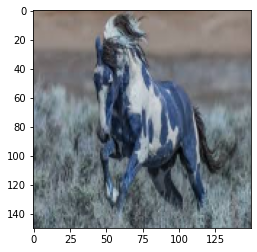

In [0]:
plt.imshow(image)

In [0]:
image = np.expand_dims(image, axis=0)
image.shape

(1, 150, 150, 3)

In [0]:
pred = saved_model.predict(image)[0][0]

if pred > 0.5:
  print("Person")
else:
  print("Horse")

Horse
